# Pytorch homework

### Instructions
- Make a copy of this notebook in your own Colab and complete the questions there.
- You can add more cells if necessary. You may also add descriptions to your code, though it is not mandatory.
- Make sure the notebook can run through by *Runtime -> Run all*. **Keep all cell outputs** for grading.
- Submit the link of your notebook 
- Please **enable editing or comments** so that you can receive feedback from TAs..

[link text](https://)Install PyTorch and Skorch.

In [1]:
!pip install -q torch skorch torchvision torchtext

     |████████████████████████████████| 185 kB 35.0 MB/s 


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import skorch
import sklearn
import numpy as np
import matplotlib.pyplot as plt

## 1. Tensor Operations (40 points)

Tensor operations are important in deep learning models. In this part, you are required to implement some common tensor operations in PyTorch.

:### 1) Tensor squeezing, unsqueezing and viewing

Tensor squeezing, unsqueezing and viewing are important methods to change the dimension of a Tensor, and the corresponding functions are [torch.squeeze](https://pytorch.org/docs/stable/torch.html#torch.squeeze), [torch.unsqueeze](https://pytorch.org/docs/stable/torch.html#torch.unsqueeze) and [torch.Tensor.view](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view). Please read the documents of the functions, and finish the following practice.

In [3]:
from re import X
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])
print(x)
x = torch.unsqueeze(x, -1) # Add two new dimensions to x by using the function torch.unsqueeze, so that the size of x becomes (3, 1, 2, 1).
x =  torch.unsqueeze(x,1)
print(x.shape)
x = torch.squeeze(x, 1)# Remove the two dimensions justed added by using the function torch.squeeze, and change the size of x back to (3, 2).
x = torch.squeeze(x, 2)
print(x.shape)
x = x.view(6)
print("Tensor after resize: ", x)# x is now a two-dimensional tensor, or in other words a matrix. Now use the function torch.Tensor.view and change x to a one-dimensional vector with size being (6).
print(x.shape)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
torch.Size([3, 1, 2, 1])
torch.Size([3, 2])
Tensor after resize:  tensor([1., 2., 3., 4., 5., 6.])
torch.Size([6])


### 2) Tensor concatenation and stack

Tensor concatenation and stack are operations to combine small tensors into big tensors. The corresponding functions are [torch.cat](https://pytorch.org/docs/stable/torch.html#torch.cat) and [torch.stack](https://pytorch.org/docs/stable/torch.html#torch.stack). Please read the documents of the functions, and finish the following practice.

In [4]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])
x.size()
# y is a tensor with size being (3, 2)
y = torch.Tensor([[-1, -2], [-3, -4], [-5, -6]])

# Our goal is to generate a tensor z with size as (2, 3, 2), and z[0,:,:] = x, z[1,:,:] = y.
# Use torch.stack to generate such a z
print("Stack tensors ")
z = torch.stack((x,y), 0)
print("the stack of z: ", z)
print(z.shape)
# Use torch.cat and torch.unsqueeze to generate such a z
print("concatenate tensors ")
z = torch.cat((x,y), 0)
print("the torch.cat of z: ", z)
print(z.shape)
print("to unsqueeze the data")
z = torch.unsqueeze(z, 1)
print(z.shape)

Stack tensors 
the stack of z:  tensor([[[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.]],

        [[-1., -2.],
         [-3., -4.],
         [-5., -6.]]])
torch.Size([2, 3, 2])
concatenate tensors 
the torch.cat of z:  tensor([[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.],
        [-1., -2.],
        [-3., -4.],
        [-5., -6.]])
torch.Size([6, 2])
to unsqueeze the data
torch.Size([6, 1, 2])


### 3) Tensor expansion

Tensor expansion is to expand a tensor into a larger tensor along singleton dimensions. The corresponding functions are [torch.Tensor.expand](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand) and [torch.Tensor.expand_as](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand_as). Please read the documents of the functions, and finish the following practice. 

In [5]:
# x is a tensor with size being (3)
x = torch.Tensor([1, 2, 3])
# Our goal is to generate a tensor z with size (2, 3), so that z[0,:,:] = x, z[1,:,:] = x.

# [TO DO]
# Change the size of x into (1, 3) by using torch.unsqueeze.
print("to unsqueeze the data")
x = torch.unsqueeze(x,0)
print(x.shape)

# [TO DO]
# Then expand the new tensor to the target tensor by using torch.Tensor.expand.

exp = x.expand(3, -1)
print("Expanded Tensor:", exp)
exp.size()

to unsqueeze the data
torch.Size([1, 3])
Expanded Tensor: tensor([[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]])


torch.Size([3, 3])

### 4) Tensor reduction in a given dimension

In deep learning, we often need to compute the mean/sum/max/min value in a given dimension of a tensor. Please read the document of [torch.mean](https://pytorch.org/docs/stable/torch.html#torch.mean), [torch.sum](https://pytorch.org/docs/stable/torch.html#torch.sum), [torch.max](https://pytorch.org/docs/stable/torch.html#torch.max), [torch.min](https://pytorch.org/docs/stable/torch.html#torch.min), [torch.topk](https://pytorch.org/docs/stable/torch.html#torch.topk), and finish the following practice.

In [6]:
# x is a random tensor with size being (10, 50)
x = torch.randn(10, 50)
# Compute the mean value for each row of x.
# You need to generate a tensor x_mean of size (10), and x_mean[k, :] is the mean value of the k-th row of x.
print("mean value")
torch.mean(x)
print(x)
k=3
x_m1 = x[k]
print(x_m1)
# Compute the sum value for each row of x.
# You need to generate a tensor x_sum of size (10).
print("Sum")
print(torch.sum(x, dim=0)) # size = [1, ncol]
# Compute the max value for each row of x.
# You need to generate a tensor x_max of size (10).
print("Max")
print(torch.max(x))
# Compute the min value for each row of x.
# You need to generate a tensor x_min of size (10).
print("Min")
print(torch.min(x))
# Compute the top-5 values for each row of x.
# You need to generate a tensor x_mean of size (10, 5), and x_top[k, :] is the top-5 values of each row in x.
x_m2 = torch.randn(10, 5)
print("x_mean value")
torch.mean(x_m2)
print(x_m2)
k=3
x_m2 = x_m2[k]
print(x_m2)

mean value
tensor([[-1.0370,  0.6617, -1.3204,  0.9978,  0.3649,  0.6650,  0.2017, -0.1225,
         -1.2115,  1.1013, -1.5280,  0.1374,  0.8110,  1.5512, -1.2852,  1.2047,
          1.8210, -0.7846, -0.6294, -0.2283, -0.3392, -0.1693,  0.6292,  1.7845,
          0.6880,  1.4920,  1.3510, -0.9804, -1.2227,  0.1272, -0.6641,  0.2824,
         -0.4899,  1.0900, -1.1007,  0.7768, -0.3700, -1.4946, -0.5286, -0.0059,
         -0.8047, -2.2571,  0.8686, -0.3732,  0.1136, -0.8069, -0.0949, -1.2973,
          1.4216,  0.8052],
        [ 0.0245, -1.7028, -1.5955, -1.1110, -0.4370, -2.1496,  0.6211, -1.6971,
         -0.4329,  1.4573, -0.6702,  0.3756, -0.1823, -0.2815, -1.9198, -0.6203,
          0.8388, -0.1987,  1.6094, -0.7474, -1.6152,  0.3527, -0.5524,  0.1425,
          1.0970, -0.7131,  0.2802, -0.6985, -0.9946,  0.5954, -1.0146, -0.6585,
          0.6979, -0.5177,  1.2881, -0.9331, -1.1723,  1.2681,  0.1196,  0.0527,
         -0.7293, -0.2371,  0.1011, -0.9832, -1.7605,  1.6343,  2.1214

Install PyTorch and Skorch.

In [ ]:
!pip install -q torch skorch torchvision torchtext

     |████████████████████████████████| 185 kB 23.7 MB/s 


## Convolutional Neural Networks




Implement a convolutional neural network for image classification on CIFAR-10 dataset.

CIFAR-10 is an image dataset of 10 categories. Each image has a size of 32x32 pixels. The following code will download the dataset, and split it into `train` and `test`. For this question, we use the default validation split generated by Skorch.

In [ ]:
# importing required libraries
import torchvision
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import skorch
from skorch.helper import predefined_split
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout, Sigmoid
import numpy as np



In [ ]:
train = torchvision.datasets.CIFAR10("./data", train=True, download=True)
test = torchvision.datasets.CIFAR10("./data", train=False, download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


The following code visualizes some samples in the dataset. You may use it to debug your model if necessary.

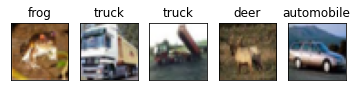

In [ ]:
def plot(data, labels=None, num_sample=5):
  n = min(len(data), num_sample)
  for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(data[i], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    if labels is not None:
      plt.title(labels[i])

train.labels = [train.classes[target] for target in train.targets]
plot(train.data, train.labels)

### 1) Basic CNN implementation


Consider a basic CNN model

- It has 3 convolutional layers, followed by a linear layer.
- Each convolutional layer has a kernel size of 3, a padding of 1.
- ReLU activation is applied on every hidden layer.

Please implement this model in the following section. You will need to tune the hyperparameters and fill the results in the table.

#### a) Implement convolutional layers

Implement the initialization function and the forward function of the CNN.

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    # implement parameter definitions here
    self.cnn_layers = Sequential(
            Conv2d(3, 4, kernel_size=3, stride=1, padding=1),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2), #Adding max pooling also
            
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            
            # Defining third 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2)
        
        )
    self.linear_layers = Sequential(
            Linear(64, 10),
            Sigmoid()
        )
  
  def forward(self, images):
    # implement the forward function here
    x = self.cnn_layers(images)
    x = x.view(x.size(0), -1)
    x = self.linear_layers(x)
    return x

#### b) Tune hyperparameters


Train the CNN model on CIFAR-10 dataset. Tune the number of channels, optimizer, learning rate and the number of epochs for best validation accuracy.

In [ ]:
# implement hyperparameters here
model = skorch.NeuralNetClassifier(CNN, criterion=torch.nn.CrossEntropyLoss,
                                   optimizer = torch.optim.SGD, lr = 0.02, max_epochs = 80)
# implement input normalization & type cast here
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_y = np.array(train.targets)
#train_y = torch.from_numpy(train_y)

train_y_onehot = np.zeros((train_y.size, train_y.max() + 1))
train_y_onehot[np.arange(train_y.size), train_y] = 1

train_x = np.array([[img[:,:,0],img[:,:,1],img[:,:,2]] for img in train.data]).astype(float)

model.fit(torch.from_numpy(np.array(train_x, dtype = np.float32)), torch.from_numpy(train_y))

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        2.2564       0.1333        2.2229  7.6228
      2        2.2117       0.1569        2.2027  7.5643
      3        2.1730       0.2140        2.1594  7.6917
      4        2.1352       0.2475        2.1164  7.4184
      5        2.0722       0.3020        2.0506  7.7827
      6        2.0272       0.2980        2.0506  7.2984
      7        2.0090       0.3370        2.0130  7.3981
      8        1.9965       0.3530        1.9931  7.6817
      9        1.9888       0.3574        1.9945  7.8385
     10        1.9812       0.3549        1.9868  7.6940
     11        1.9752       0.3469        1.9929  7.5437
     12        1.9696       0.3586        1.9840  7.5971
     13        1.9642       0.3756        1.9667  7.7023
     14        1.9619       0.3817        1.9650  7.5391
     15        1.9588       0.3800        1.9606  7.8981
     16        1.9554       0.3

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=CNN(
    (cnn_layers): Sequential(
      (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (linear_layers): Sequential(
      (0): Linear(in_features=64, out_features=10, bias=True)
      (1): Sigmoid()
    )
  ),
)

Validation loss obtained using SGD optimizer for 50 epochs is 1.9457
Validation loss obtained using SGD optimizer for 80 epochs is 1.9392 

In [ ]:
# implement hyperparameters here
model = skorch.NeuralNetClassifier(CNN, criterion=torch.nn.CrossEntropyLoss,
                                   optimizer = torch.optim.Adam, lr = 0.2, max_epochs = 50)
# implement input normalization & type cast here
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_y = np.array(train.targets)
#train_y = torch.from_numpy(train_y)

train_y_onehot = np.zeros((train_y.size, train_y.max() + 1))
train_y_onehot[np.arange(train_y.size), train_y] = 1

train_x = np.array([[img[:,:,0],img[:,:,1],img[:,:,2]] for img in train.data]).astype(float)

model.fit(torch.from_numpy(np.array(train_x, dtype = np.float32)), torch.from_numpy(train_y))

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        2.3616       0.1000        2.3612  8.6093
      2        2.3612       0.1000        2.3612  9.9424
      3        2.3612       0.1000        2.3612  8.3205
      4        2.3612       0.1000        2.3612  7.8114
      5        2.3612       0.1000        2.3612  7.7383
      6        2.3612       0.1000        2.3612  7.7371
      7        2.3612       0.1000        2.3612  7.6811
      8        2.3612       0.1000        2.3612  7.6484
      9        2.3612       0.1000        2.3612  7.7050
     10        2.3612       0.1000        2.3612  7.9149
     11        2.3612       0.1000        2.3612  7.7035
     12        2.3612       0.1000        2.3612  8.2284
     13        2.3612       0.1000        2.3612  7.7088
     14        2.3612       0.1000        2.3612  7.6084
     15        2.3612       0.1000        2.3612  7.7143
     16        2.3612       0.1

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=CNN(
    (cnn_layers): Sequential(
      (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (linear_layers): Sequential(
      (0): Linear(in_features=64, out_features=10, bias=True)
      (1): Sigmoid()
    )
  ),
)

Adam optimizer could achieve 2.3612

Write down **validation accuracy** of your model under different hyperparameter settings. Note the validation set is automatically split by Skorch during `model.fit()`.

**Hint:** You may need more epochs for SGD than Adam.

| #channel for each layer \ optimizer | SGD   | Adam  |
|-------------------------------------|-------|-------|
| (128, 128, 128)                     |       |       |
| (256, 256, 256)                     |       |       |
| (512, 512, 512)                     |       |       |


#### c) Use larger CNN model
> Indented block



Add more Convolution/BatchNorm/Pooling/DropOut/Linear layers to improve the accuracy.

In [ ]:
class CNNLarge(nn.Module):
  def __init__(self):
    super(CNNLarge, self).__init__()
    # implement parameter definitions here
    self.cnn_layers = Sequential(
            Conv2d(3, 4, kernel_size=3, stride=1, padding=1),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2), #Adding max pooling also
            
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            
            # Defining third 2D convolution layer
            Conv2d(4, 8, kernel_size=3, stride=1, padding=1),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),

            # Defining fourth 2D convolution layer
            Conv2d(8, 16, kernel_size=3, stride=1, padding=1),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        
            # Defining fifth 2D convolution layer
            Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2)
        
        )
    self.linear_layers = Sequential(
            Linear(32, 10)
        )
  
  def forward(self, images):
    # implement the forward function here
    x = self.cnn_layers(images)
    x = x.view(x.size(0), -1)
    x = self.linear_layers(x)
    return x

# implement hyperparameters here
model = skorch.NeuralNetClassifier(CNNLarge, criterion=torch.nn.CrossEntropyLoss,
                                   optimizer = torch.optim.SGD, lr = 0.02, max_epochs = 50)
# implement input normalization & type cast here
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_y = np.array(train.targets)
#train_y = torch.from_numpy(train_y)

train_y_onehot = np.zeros((train_y.size, train_y.max() + 1))
train_y_onehot[np.arange(train_y.size), train_y] = 1

train_x = np.array([[img[:,:,0],img[:,:,1],img[:,:,2]] for img in train.data]).astype(float)

model.fit(torch.from_numpy(np.array(train_x, dtype = np.float32)), torch.from_numpy(train_y))

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        2.2608       0.2042        2.1160  8.4619
      2        1.9980       0.2766        1.9392  8.4601
      3        1.8505       0.3473        1.7859  8.2478
      4        1.7526       0.3628        1.7747  8.3604
      5        1.6938       0.3786        1.6956  8.5037
      6        1.6556       0.3923        1.6679  8.3975
      7        1.6272       0.4118        1.6227  8.4142
      8        1.6061       0.4194        1.5975  8.5926
      9        1.5875       0.4146        1.5976  9.4106
     10        1.5706       0.4283        1.5837  8.5247
     11        1.5544       0.4286        1.5701  8.5465
     12        1.5415       0.3656        1.7803  8.6729
     13        1.5263       0.4024        1.6732  11.3805
     14        1.5180       0.4232        1.5944  11.6643
     15        1.5050       0.4184        1.6173  11.9321
     16        1.4906       

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=CNNLarge(
    (cnn_layers): Sequential(
      (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (9): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (10): ReLU(inplace=True)
      (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (12): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): 

Using a larger architecture, I could obtain much better loss of 1.4682. This clearly proves that this problem requires complexity and using bigger models can give better results